In [1]:
from matplotlib import pyplot as plt
import numpy as np

Modular exponentiation is periodic:


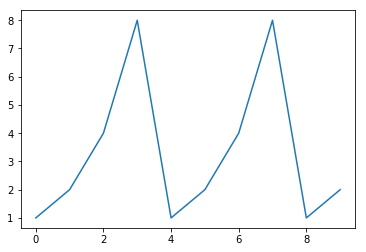

In [2]:
N = 5*3
x = 2

#modular exponentiation
def mod_exp(N,x,r):
    return ((x**r)%N)

print("Modular exponentiation is periodic:")
rs = np.arange(10)
plt.plot(rs, mod_exp(N,x,rs))

The period for x= 2 and N= 15  is:  4


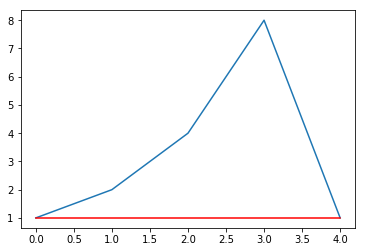

In [3]:
#returns period and x^r mod N across period
def period_finding(N, x):
    
    r=0
    rs=[]
    period=0
    period_found = False
    modular_exp=[]
    
    e = (x**r)%N
    modular_exp.append(e)
    rs.append(r)
    
    while not period_found:
        
        r+=1
        e = (x**r)%N
        modular_exp.append(e)
        rs.append(r)
        if e==1:
            period_found = True
            period = r
        
        
    return period, rs, modular_exp
        
period, rs, e = period_finding(N,x)
print("The period for x=",x ,"and N=", N, " is: ", period)
plt.plot(rs, e)
plt.plot(rs, np.ones(len(rs)), color="red")

## Order finding

We want to find the period of $x^r \pmod{N}$.
The quantum algorithm for order/period finding:

1. choose $l$ such that $N^2 \leq 2^l \leq 2 N^2$ and initialize two registers $Q_1$ and $Q_2$ composed of $l$ qubits each
2. apply $l$ Hadamard gates to obtain superposition of all computational basis states in $Q_1$
3. apply oracle $U_f$, which writes the result of the modular exponentiation into $Q_2$
4. apply the quantum fourier transform (QFT) to $Q_1$
5. measure $Q_1$ saving the result $c$ to a classical register

cite https://arxiv.org/pdf/1202.6614.pdf for hard coded oracle?

These steps conclude the quantum part of the order finding process. Next we need to check the result classically and with a small probability we will have to run the algorithm again, because it returned a wrong result.


The classical part works as follows:

1. compute $r= \frac{q}{\gcd(c,q)}$
2. check $x^r \pmod{N} = 1$ ?
3. on success return period $r$, on failure rerun the algorithm

In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import kraus_error
from qiskit.tools.visualization import plot_histogram

In [5]:
def quantum_fourier_transform(circuit, q):
    n = len(q)
    for i in range(n):
        circuit.h(q[i])
        for k in range(i + 1, n):
            phase = 2.0 * np.pi / (2 ** (k - i + 1))
            circuit.cu1(phase, q[i], q[k])
        circuit.barrier()
    for i in range(n // 2):
        circuit.swap(q[i], q[n - 1 - i])
        
def build_quantum_circuit (x):
    return init + choose_circuit[x] + qft + meas

In [6]:
#factorize 15
N = 15

### 1. choose l and initialize
#N^2 = 225 < 2^8 = 256
l = 8

#create Quantum Registers
q1 = QuantumRegister(8, 'q1')
q2 = QuantumRegister(8, 'q2')

#create Classical Register
c = ClassicalRegister(8, 'c')

#create Quantum Circuit
init = QuantumCircuit(q1, q2, c)

### 2. apply Hadamard gates
init.h(q1)
init.barrier()


### 3. apply oracle
#x=2
u_2 = QuantumCircuit(q1, q2, c)

u_2.x(q1[0])
u_2.x(q1[1])
u_2.ccx(q1[0],q1[1],q2[0])
u_2.x(q1[1])
u_2.x(q1[0])

u_2.x(q1[1])
u_2.ccx(q1[0],q1[1],q2[1])
u_2.x(q1[1])

u_2.x(q1[0])
u_2.ccx(q1[0],q1[1],q2[2])
u_2.x(q1[0])

u_2.ccx(q1[0],q1[1],q2[3])

u_2.barrier()

#x=4
u_4 = QuantumCircuit(q1, q2, c)

u_4.x(q1[0])
u_4.cx(q1[0],q2[0])
u_4.x(q1[0])

u_4.cx(q1[0],q2[2])

u_4.barrier()

#x=7
u_7 = QuantumCircuit(q1, q2, c)

u_7.x(q2[0])
u_7.x(q2[2])

u_7.x(q1[0])
u_7.ccx(q1[0],q1[1],q2[0])
u_7.x(q1[0])

u_7.x(q1[1])
u_7.ccx(q1[0],q1[1],q2[1])
u_7.x(q1[1])

u_7.x(q1[0])
u_7.x(q1[1])
u_7.ccx(q1[0],q1[1],q2[2])
u_7.x(q1[1])
u_7.x(q1[0])

u_7.ccx(q1[0],q1[1],q2[3])

u_7.barrier()

#x=8
u_8 = QuantumCircuit(q1, q2, c)

u_8.x(q1[0])
u_8.x(q1[1])
u_8.ccx(q1[0],q1[1],q2[0])
u_8.x(q1[1])
u_8.x(q1[0])

u_8.ccx(q1[0],q1[1],q2[1])

u_8.x(q1[0])
u_8.ccx(q1[0],q1[1],q2[2])
u_8.x(q1[0])

u_8.x(q1[1])
u_8.ccx(q1[0],q1[1],q2[3])
u_8.x(q1[1])

u_8.barrier()

#x=11
u_11 = QuantumCircuit(q1, q2, c)

u_11.x(q2[0])

u_11.cx(q1[0],q2[1])

u_11.cx(q1[0],q2[3])

u_11.barrier()

#x=13
u_13 = QuantumCircuit(q1, q2, c)

u_13.x(q2[0])

u_13.x(q2[2])

u_13.x(q1[0])
u_13.ccx(q1[0],q1[1],q2[0])
u_13.x(q1[0])

u_13.ccx(q1[0],q1[1],q2[1])

u_13.x(q1[0])
u_13.x(q1[1])
u_13.ccx(q1[0],q1[1],q2[2])
u_13.x(q1[1])
u_13.x(q1[0])

u_13.x(q1[1])
u_13.ccx(q1[0],q1[1],q2[3])
u_13.x(q1[1])

u_13.barrier()

#x=14
u_14 = QuantumCircuit(q1,q2,c)

u_14.x(q1[0])
u_14.cx(q1[0],q2[0])
u_14.x(q1[0])

u_14.cx(q1[0],q2[1])

u_14.cx(q1[0],q2[2])

u_14.cx(q1[0],q2[3])

u_14.barrier()


### 4. apply QFT (use sample solution for arbitrary number of qubits)

qft = QuantumCircuit(q1)
quantum_fourier_transform(qft, q1)


### 5. measure Register q1

meas = QuantumCircuit(q1, c)
meas.measure(q1, c)

### Create dictionary to allow for random x

choose_circuit = {2: u_2, 4: u_4, 7: u_7, 8: u_8, 11: u_11, 13: u_13, 14: u_14}

3
6
3
11


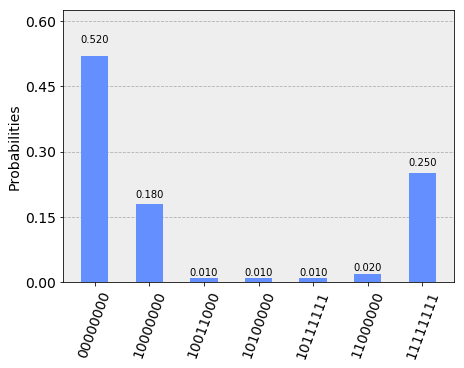

In [7]:
### Choose random x between 1 < x < N and calculate gcd(x,N)
gcd = 0
while gcd != 1:
    
    x = np.random.randint(2,14)
    gcd = np.gcd(x, N)
    print(x)

    
    
### Build Circuit
complete_circuit = build_quantum_circuit(x)


### Draw it because it looks nice
complete_circuit.draw(output = 'mpl')


### to minimize noise errors, let it run several times

shots = 100

backend = Aer.get_backend('qasm_simulator')
job = execute(complete_circuit, backend, shots=shots)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

In [8]:
#find the highest contribution and find decimal representation
number_binary = []
count = []
for y, z in counts.items():
    number_binary.append(y)
    count.append(z)

binary_c = number_binary[np.argmax(count)]

c = int(binary_c,2)

### calculate r by 2^l/gcd(c, 2^l)
r = 2**l/np.gcd(c, 2**l)
print(r)


### calculate possible prime factors
prime1 = np.gcd(x**(int(r/2))-1, N)
prime2 = np.gcd(x**(int(r/2))+1, N)

print(prime1, prime2)

1.0
15 1


In [10]:
gate_time = 1.0

# Custom noise model with amplitude damping
t1 = 40.0
gamma = 1.0 - np.exp(-gate_time / t1)

# create noise model object
noise_model = NoiseModel()
# create quantum error object from Kraus operators k0 and k1
k0 = np.asarray([[1.0, 0.0], [0.0, np.sqrt(1.0 - gamma)]])
k1 = np.asarray([[0.0, np.sqrt(gamma)], [0.0, 0.0]])
error = kraus_error([k0, k1])
# add the quantum error for the identity gate and qubit 0 to the noise model
noise_model.add_quantum_error(error, 'h', [0])
# the noise_model option requires the backend Aer instead of BasicAer
backend = Aer.get_backend('qasm_simulator')
# simulate a list of quantum circuits using the custom noise model
job = execute(complete_circuit, backend, shots=shots, noise_model=noise_model)
result = job.result()

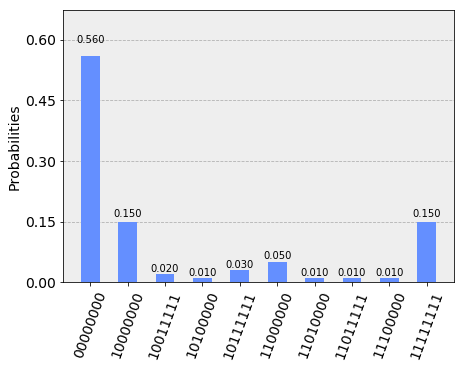

In [11]:
counts = result.get_counts(complete_circuit)
plot_histogram(counts)

In [12]:
n1 = np.fromiter((result.get_counts(i).get('1', 0) for i in range(len(complete_circuit))), dtype=np.int)

prob1 = n1 / shots
prob1_err = np.sqrt(prob1 * (1.0 - prob1) / shots)

# The optimizer scipy.optimize.curve_fit does not work if some errors are exactly zero.
# Therefore, replace all zeros with the minimal error corresponding to the error of a single detection.
prob1_err[prob1_err == 0.0] = np.sqrt((1 / shots) * (1.0 - (1 / shots)) / shots)

print(prob1)
print(prob1_err)

IndexError: list index out of range

In [140]:
#from qiskit import IBMQ
#IBMQ.load_accounts()


#IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]

In [143]:
backend = 'ibmxq4'



In [145]:
shots = 10

qobj = compile(complete_circuit, backend=backend, shots=10)
job = backend.run(qobj)




TypeError: compile() missing required argument 'filename' (pos 2)

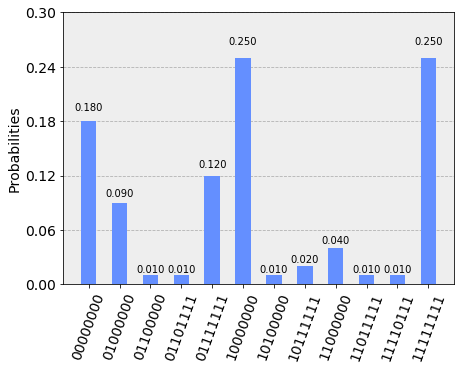

In [146]:
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

In [147]:
#find the highest contribution and find decimal representation
number_binary = []
count = []
for y, z in counts.items():
    number_binary.append(y)
    count.append(z)

binary_c = number_binary[np.argmax(count)]

c = int(binary_c,2)

### calculate r by 2^l/gcd(c, 2^l)
r = 2**l/np.gcd(c, 2**l)
print(r)


### calculate possible prime factors
prime1 = np.gcd(x**(int(r/2))-1, N)
prime2 = np.gcd(x**(int(r/2))+1, N)

print(prime1, prime2)

2.0
1 3
